In [1]:
import pandas as pd
import requests

In [2]:
response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=d0a034dca896e032f9965d777eca5d89&language=en-US&page=1')

In [3]:
temp_df = pd.DataFrame(response.json()['results'])[['id','title','overview','release_date','popularity','vote_average','vote_count']]

In [4]:


temp_df.head()

,id,title,overview,release_date,popularity,vote_average,vote_count
0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,30.3054,8.712,28542
1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,27.6631,8.687,21622
2,803796,KPop Demon Hunters,"When K-pop superstars Rumi, Mira and Zoey aren...",2025-06-20,212.5451,8.612,603
3,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,15.1110,8.571,13054
4,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,11.8201,8.565,16535


In [5]:
df = pd.DataFrame()

In [6]:
import pandas as pd
import requests

all_data = []  

for i in range(1, 200):
    response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=8b623b4ffb0cc191e8e9843939781a4f&language=en-US&page={}'.format(i))
    
    temp_df = pd.DataFrame(response.json()['results'])[
        ['id','title','overview','release_date','popularity','vote_average','vote_count']
    ]
    
    all_data.append(temp_df) 

df = pd.concat(all_data, ignore_index=True)

In [58]:
df.shape


(3882, 10)

In [59]:
df.to_csv('tmdb_top_movies_snapshot.csv', index=False)


In [60]:
df = pd.read_csv('tmdb_top_movies_snapshot.csv')


In [61]:
df.head()

,id,title,overview,release_date,popularity,vote_average,vote_count,release_year,release_month,release_day
0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,30.3054,8.712,28542,1994,9,23
1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,27.6631,8.687,21622,1972,3,14
2,803796,KPop Demon Hunters,"When K-pop superstars Rumi, Mira and Zoey aren...",2025-06-20,212.5451,8.612,603,2025,6,20
3,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,15.1110,8.571,13054,1974,12,20
4,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,11.8201,8.565,16535,1993,12,15


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3882 entries, 0 to 3881
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             3882 non-null   int64         
 1   title          3882 non-null   object        
 2   overview       3881 non-null   object        
 3   release_date   3882 non-null   datetime64[ns]
 4   popularity     3882 non-null   float64       
 5   vote_average   3882 non-null   float64       
 6   vote_count     3882 non-null   int64         
 7   release_year   3882 non-null   int32         
 8   release_month  3882 non-null   int32         
 9   release_day    3882 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(2)
memory usage: 257.9+ KB


In [68]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


In [69]:
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day'] = df['release_date'].dt.day


In [70]:
df.head()

,id,title,overview,release_date,popularity,vote_average,vote_count,release_year,release_month,release_day
0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,30.3054,8.712,28542,1994,9,23
1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,27.6631,8.687,21622,1972,3,14
2,803796,KPop Demon Hunters,"When K-pop superstars Rumi, Mira and Zoey aren...",2025-06-20,212.5451,8.612,603,2025,6,20
3,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,15.1110,8.571,13054,1974,12,20
4,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,11.8201,8.565,16535,1993,12,15


In [71]:
df.isnull().sum()


id               0
title            0
overview         1
release_date     0
popularity       0
vote_average     0
vote_count       0
release_year     0
release_month    0
release_day      0
dtype: int64

In [72]:
df.duplicated().sum()


np.int64(0)

In [77]:
df = df.drop_duplicates(subset=['title', 'release_year'], keep='first')




In [78]:
df.duplicated().sum()

np.int64(0)

In [79]:
df[df['release_year']==2025]

,id,title,overview,release_date,popularity,vote_average,vote_count,release_year,release_month,release_day
2,803796,KPop Demon Hunters,"When K-pop superstars Rumi, Mira and Zoey aren...",2025-06-20,212.5451,8.612,603,2025,6,20
58,1356039,Counterattack,When a hostage rescue mission creates a new en...,2025-02-27,16.0225,8.315,718,2025,2,27
332,1376434,Predator: Killer of Killers,While three of the fiercest warriors in human ...,2025-06-05,64.2960,7.966,710,2025,6,5
410,1426776,STRAW,What will be her last straw? A devastatingly b...,2025-06-05,52.6379,7.911,735,2025,6,5
427,1087192,How to Train Your Dragon,"On the rugged isle of Berk, where Vikings and ...",2025-06-06,175.5827,7.900,644,2025,6,6
753,950396,The Gorge,Two highly trained operatives grow close from ...,2025-02-13,47.7796,7.721,2799,2025,2,13
894,911430,F1,Racing legend Sonny Hayes is coaxed out of ret...,2025-06-25,164.2385,7.700,754,2025,6,25
1106,1233413,Sinners,"Trying to leave their troubled lives behind, t...",2025-04-16,113.5348,7.566,2017,2025,4,16
1434,1294203,My Fault: London,"18-year-old Noah moves from America to London,...",2025-02-12,34.7980,7.500,423,2025,2,12
1560,986056,Thunderbolts*,After finding themselves ensnared in a death t...,2025-04-30,293.1480,7.430,1801,2025,4,30


<Axes: xlabel='release_year', ylabel='vote_average'>

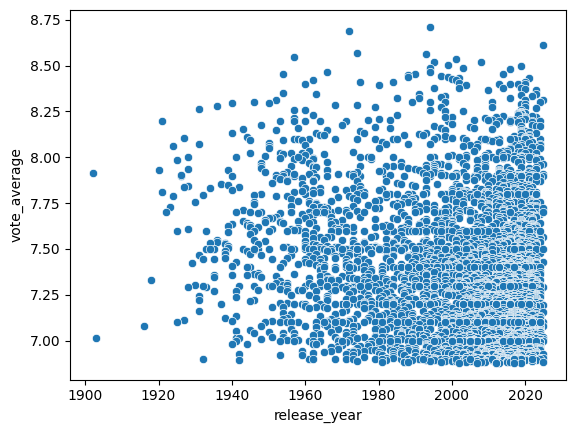

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='release_year', y='vote_average')


In [89]:
C = df['vote_average'].mean()
m = df['vote_count'].mean()

# Step 3: Define weighted rating formula (same as IMDb)
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v / (v + m)) * R + (m / (m + v)) * C

# Step 4: Apply to all movies
df['weighted_rating'] = df.apply(weighted_rating, axis=1)

In [91]:
df_sorted = df.sort_values('weighted_rating', ascending=False)


In [92]:
df_sorted.head(10)

,id,title,overview,release_date,popularity,vote_average,vote_count,release_year,release_month,release_day,score,weighted_rating
0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,30.3054,8.712,28542,1994,9,23,8.425920,8.591210
1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,27.6631,8.687,21622,1972,3,14,8.340579,8.535031
7,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,2008-07-16,24.5432,8.522,34065,2008,7,16,8.309365,8.434073
4,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,11.8201,8.565,16535,1993,12,15,8.185962,8.391300
11,680,Pulp Fiction,"A burger-loving hit man, his philosophical par...",1994-09-10,17.3853,8.489,28847,1994,9,10,8.253279,8.389605
16,157336,Interstellar,The adventures of a group of explorers who mak...,2014-11-05,36.2583,8.457,37427,2014,11,5,8.271473,8.381049
12,122,The Lord of the Rings: The Return of the King,As armies mass for a final battle that will de...,2003-12-17,20.2074,8.488,25246,2003,12,17,8.226916,8.375981
6,129,Spirited Away,"A young girl, Chihiro, becomes trapped in a st...",2001-07-20,16.4209,8.537,17279,2001,7,20,8.177950,8.373710
14,13,Forrest Gump,A man with a low IQ has accomplished great thi...,1994-06-23,21.5338,8.468,28381,1994,6,23,8.233829,8.369057
3,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,15.1110,8.571,13054,1974,12,20,8.126758,8.358266


In [97]:
df['release_year'] = df['release_date'].dt.year
top_per_year = df.sort_values('weighted_rating', ascending=False).groupby('release_year').first().reset_index()
top_per_year[['release_year', 'title', 'weighted_rating']].head(150)



,release_year,title,weighted_rating
0,1902,A Trip to the Moon,7.597580
1,1903,The Great Train Robbery,7.323621
2,1916,Intolerance: Love's Struggle Throughout the Ages,7.359436
3,1918,A Dog's Life,7.386738
4,1920,The Cabinet of Dr. Caligari,7.589834
...,...,...,...
105,2021,Zack Snyder's Justice League,7.958809
106,2022,Top Gun: Maverick,7.999596
107,2023,Spider-Man: Across the Spider-Verse,8.087454
108,2024,The Wild Robot,7.975484


C:\Users\OM PRAKASH GADHWAL\AppData\Local\Temp\ipykernel_15544\1883024039.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='release_year', y='weighted_rating', ci=None, color='purple')


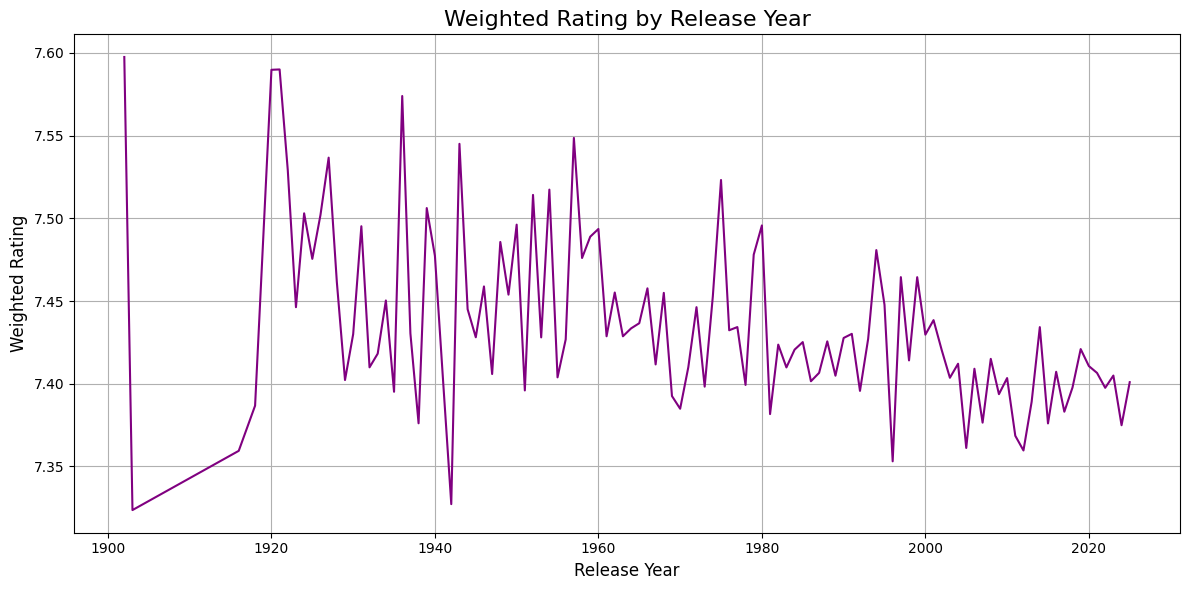

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='release_year', y='weighted_rating', ci=None, color='purple')
plt.title('Weighted Rating by Release Year', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Weighted Rating', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [99]:
df.to_csv('top_movies.csv', index=False)